In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#### Import Dataset

In [2]:
dataset = pd.read_csv('sms.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [3]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [4]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
dataset.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
from sklearn.utils import shuffle

dataset = shuffle(dataset)
dataset.head()

,text,spam
2397,Subject: benefits - personal days vince : is...,0
3350,Subject: risk 2000 panel discussion draft age...,0
3012,Subject: re : enron offsite - the great divide...,0
2618,Subject: dot . odpowiedzi na list mam nadziej...,0
3279,Subject: re : ut short course travel arrangeme...,0


#### Clean SMS text data

In [7]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

english_stopwords = stopwords.words('english')
english_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mosope/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:

def clean_text(message):
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    
    stemmer = SnowballStemmer('english')
    message = [stemmer.stem(word) for word in message if word not in english_stopwords]
    message = ' '.join(message)
    
    return message

In [9]:
dataset['text'] = dataset['text'].apply(clean_text)

In [10]:
dataset

,text,spam
2397,subject benefit person day vinc follow right s...,0
3350,subject risk panel discuss draft agenda attach...,0
3012,subject enron offsit great divid april th hell...,0
2618,subject dot odpowiedzi na list mam nadziej ze ...,0
3279,subject ut short cours travel arrang martin jo...,0
...,...,...
2097,subject f u iri mack mba phd enron vinc iri re...,0
2606,subject good candid ok get start let know rodn...,0
1061,subject highest concentr pure human pheromon o...,1
2407,subject summer houston visit anjam make sens c...,0


#### Text feature extraction - Create bag of words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['text']).toarray()
y = dataset['spam'].values


vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaenerfax', 'aadedeji', 'aagraw', 'aal', 'aaldous',
       'aaliyah', 'aall', 'aanalysi', 'aaron', 'aawesom', 'ab', 'aba',
       'abacha', 'abacus', 'abahi', 'abaixo', 'abandon', 'abargain',
       'abarr', 'abattoir', 'abb', 'abba', 'abbestellen', 'abbott',
       'abbrevi', 'abc', 'abcsearch', 'abdalla', 'abdallat', 'abdelnour',
       'abdul', 'abdulla', 'abdullah', 'abei', 'abel', 'abello', 'aber',
       'abernathi', 'abet', 'abey', 'abf', 'abhay', 'abi', 'abid',
       'abidjan', 'abiiiti', 'abil', 'abilen', 'abilmesi', 'abit',
       'abitibi', 'abklaeren', 'abl', 'abler', 'abli', 'ablig', 'ablx',
       'abn', 'abneg', 'abnorm', 'aboard', 'abolish', 'abond', 'abook',
       'aborigin', 'aborm', 'abort', 'about', 'aboutthi', 'aboutus',
       'aboutvenita', 'aboveground', 'abovenet', 'abovetelefax',
       'abqewvbgf', 'abr', 'abraham', 'abram', 'abramov', 'abramowicz',
       'abras', 'abreast', 'abreo', 'abridg', 'abroad', 'abscissa',
       'abscond', '

In [12]:
X.shape

(5728, 25607)

#### Train Naive Bayes Models (Gaussian & Multinomial)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X = X_train, y = y_train)

mnb_classifier = MultinomialNB()
mnb_classifier.fit(X = X_train, y = y_train)

MultinomialNB()

#### Test and Evaluate models

In [16]:
gnb_y_pred = gnb_classifier.predict(X_test)
mnb_y_pred = mnb_classifier.predict(X_test)

##### evaluating Gaussian model

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       857
           1       0.92      0.91      0.91       289

    accuracy                           0.96      1146
   macro avg       0.94      0.94      0.94      1146
weighted avg       0.96      0.96      0.96      1146



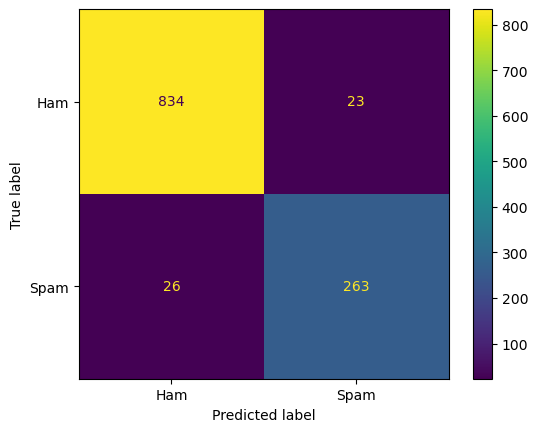

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, gnb_y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
print(classification_report(y_test, gnb_y_pred))

#### Evaluating Multinomial model

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       857
           1       0.97      0.99      0.98       289

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



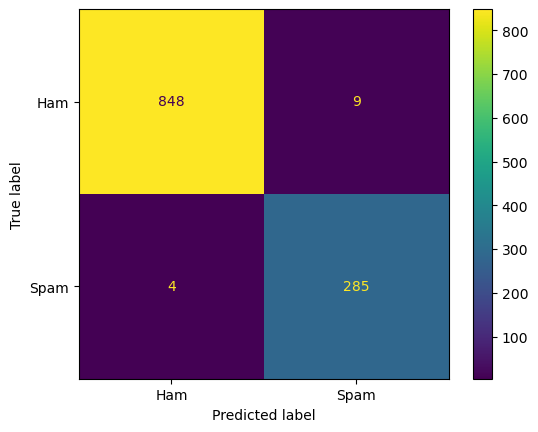

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, mnb_y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
print(classification_report(y_test, mnb_y_pred))

In [21]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=mnb_classifier, X = X_train, y = y_train, cv = 10)

print(accuracies)
print("Accuracy: {}%".format(accuracies.mean()*100))

[0.98910675 0.98910675 0.98908297 0.98471616 0.98689956 0.99563319
 0.99344978 0.98034934 0.98908297 0.99344978]
Accuracy: 98.90877263083787%
